In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import geopandas
from IPython.display import display # display(df) shows dataframe in html formatting


print(sys.version)
print(np.__version__)
print(pd.__version__)

3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
1.11.1
0.18.1


### Note
This requires the `geopandas` package. It didn't install for me with the regular `conda install geopandas`, and instead I needed to use `conda install -c conda-forge geopandas`. I don't know if something similar is required for a `pip install`.

Geopandas docs: http://geopandas.org/data_structures.html?highlight=geoseries%20point

## 2016 ZCTA file
Taken from https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html

In [66]:
gdf = geopandas.read_file('./cb_2016_us_zcta510_500k/cb_2016_us_zcta510_500k.shp')

Setting max/min values to box in SF. I grabbed these from Google Maps. They don't need to be precise, as long as the box fully contains SF and doesn't fully contain any other ZCTA

In [67]:
lon_min = -122.538311
lon_max = -122.336087
lat_min = 37.699946
lat_max = 37.846774

In [69]:
# Bounds is the bounding box surrounding each individual ZCTA
gdf_bounds = gdf.bounds

# Extracting the ZCTAs fully contained in the SF bounding box 
gdf = gdf[(gdf_bounds.minx > lon_min) & (gdf_bounds.maxx < lon_max) & (gdf_bounds.miny > lat_min) & (gdf_bounds.maxy < lat_max)]
print(len(gdf))
gdf.head()

27


,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
102,94102,8600000US94102,94102,1732307,0,"POLYGON ((-122.429929 37.777909, -122.426829 3..."
1041,94116,8600000US94116,94116,6699045,97204,"POLYGON ((-122.510297 37.764073, -122.509833 3..."
1499,94158,8600000US94158,94158,1703879,1342698,"POLYGON ((-122.397866 37.772323, -122.396381 3..."
1893,94117,8600000US94117,94117,4373059,1625,"POLYGON ((-122.477297 37.766069, -122.473124 3..."
2312,94104,8600000US94104,94104,200857,0,"POLYGON ((-122.404613 37.793565, -122.401315 3..."


In [73]:
gdf_zips = list(gdf.ZCTA5CE10)
gdf_zips = sorted(gdf_zips)
print(len(gdf_zips))
gdf_zips

27


['94102',
 '94103',
 '94104',
 '94105',
 '94107',
 '94108',
 '94109',
 '94110',
 '94111',
 '94112',
 '94114',
 '94115',
 '94116',
 '94117',
 '94118',
 '94121',
 '94122',
 '94123',
 '94124',
 '94127',
 '94129',
 '94130',
 '94131',
 '94132',
 '94133',
 '94134',
 '94158']

## Loading list of zip codes from the SF Fire data
I manually copied these over after grabbing all unique values from the SF data

In [75]:
data_zips = [94122.0, 94102.0, 94124.0, 94110.0, 94116.0, 94118.0, 94115.0,
             94117.0, 94103.0, 94109.0, 94121.0, 94105.0, 94134.0, 94108.0,
             94107.0, 94112.0, 94111.0, 94132.0, 94114.0, 94123.0, 94133.0,
             94131.0, 94127.0, 94130.0, 94104.0, 94158.0, 94129.0]
data_zips = [str(int(x)) for x in data_zips]
data_zips = sorted(data_zips)
print(len(data_zips))
data_zips

27


['94102',
 '94103',
 '94104',
 '94105',
 '94107',
 '94108',
 '94109',
 '94110',
 '94111',
 '94112',
 '94114',
 '94115',
 '94116',
 '94117',
 '94118',
 '94121',
 '94122',
 '94123',
 '94124',
 '94127',
 '94129',
 '94130',
 '94131',
 '94132',
 '94133',
 '94134',
 '94158']

## Comparing lists

In [76]:
[x for x in data_zips if x not in gdf_zips]

[]

In [77]:
[x for x in gdf_zips if x not in data_zips]

[]

Fortunately the two lists are identical. Apparently the 94158 zip code that we were worried about is included in 2016. It is still possible that their is not a 94158 ZCTA in earlier years though, so for those years we may need to make an adjustment.

In [162]:
# Saving Shape File
# gdf.to_file('./sf_zcta.shp')

## Using Geopandas

Loading Saved File

In [144]:
gdf = geopandas.read_file('./sf_zcta/sf_zcta.shp')
gdf

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,94102,8600000US94102,94102,1732307,0,"POLYGON ((-122.429929 37.777909, -122.426829 3..."
1,94116,8600000US94116,94116,6699045,97204,"POLYGON ((-122.510297 37.764073, -122.509833 3..."
2,94158,8600000US94158,94158,1703879,1342698,"POLYGON ((-122.397866 37.772323, -122.396381 3..."
3,94117,8600000US94117,94117,4373059,1625,"POLYGON ((-122.477297 37.766069, -122.473124 3..."
4,94104,8600000US94104,94104,200857,0,"POLYGON ((-122.404613 37.793565, -122.401315 3..."
5,94129,8600000US94129,94129,5963991,14697,"POLYGON ((-122.485783 37.790629, -122.480296 3..."
6,94110,8600000US94110,94110,6019920,12207,"POLYGON ((-122.426722 37.736372, -122.425082 3..."
7,94132,8600000US94132,94132,8054465,1299131,"POLYGON ((-122.508087717965 37.735197790538, -..."
8,94108,8600000US94108,94108,698155,0,"POLYGON ((-122.414826 37.794988, -122.404412 3..."
9,94111,8600000US94111,94111,891133,494314,"POLYGON ((-122.405922 37.806462, -122.403494 3..."


In [126]:
# creating a point
# Note that the Point object appears to want arguments as x,y, which corresponds to lon,lat - not lat,lon like you would expect.
point1 = geopandas.geoseries.Point(-122.502186, 37.754033)
# extracting the polygon for zip code 94122
poly1 = gdf.geometry[29952]

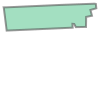

In [113]:
# Showing a polygon - that was easy!
poly1

In [155]:
# Testing for an intersection - this will be useful for determining which ZCTA a lat/lon coordinate is in
print(poly1.contains(point1))
print(point1.within(poly1))

True
True


In [130]:
# Testing all regions
gdf.geometry.contains(point1)

102      False
1041     False
1499     False
1893     False
2312     False
4711     False
7435     False
7576     False
7927     False
7928     False
8102     False
9355     False
9898     False
10465    False
13597    False
16800    False
25776    False
29169    False
29170    False
29255    False
29282    False
29423    False
29455    False
29456    False
29457    False
29464    False
29952     True
dtype: bool

In [143]:
# Getting ZCTA that contains the point
point_zip = gdf.ZCTA5CE10[gdf.geometry.contains(point1)].values[0]
print(point_zip)

94122


In [146]:
# Finding the centroids of polygons
print(poly1.centroid)
centroids = gdf.geometry.centroid
print(centroids)

POINT (-122.4851476849164 37.75878649791513)
0      POINT (-122.4192877923651 37.7796913704253)
1      POINT (-122.4861669394649 37.7446069917895)
2     POINT (-122.3875509671313 37.76967230769329)
3       POINT (-122.4482273467271 37.769749367556)
4     POINT (-122.4020734762314 37.79145790249981)
5     POINT (-122.4668400512062 37.79751989324696)
6        POINT (-122.4153763268 37.74995708242039)
7      POINT (-122.484891415384 37.72215076805941)
8     POINT (-122.4086384226458 37.79203093691396)
9     POINT (-122.3983586870879 37.79893302468089)
10    POINT (-122.4594176782446 37.73568366260329)
11    POINT (-122.4111439180409 37.77323094936967)
12    POINT (-122.4382572128714 37.80046762466299)
13    POINT (-122.4944872210406 37.77650670409459)
14    POINT (-122.3695336222321 37.82042572157066)
15    POINT (-122.4624563322676 37.78010371844077)
16      POINT (-122.41074305609 37.80380946162059)
17    POINT (-122.4354155822417 37.75804305971192)
18    POINT (-122.4372127612351 37.78

In [147]:
# Finding distances between points
# In this case, the distance from each centroid to point 1
centroids.distance(point1)

0     0.086778
1     0.018587
2     0.115697
3     0.056201
4     0.106879
5     0.056040
6     0.086905
7     0.036271
8     0.100970
9     0.113120
10    0.046538
11    0.093044
12    0.079013
13    0.023756
14    0.148340
15    0.047520
16    0.104113
17    0.066891
18    0.072407
19    0.096775
20    0.068125
21    0.119819
22    0.114065
23    0.108270
24    0.089955
25    0.059913
26    0.017689
dtype: float64

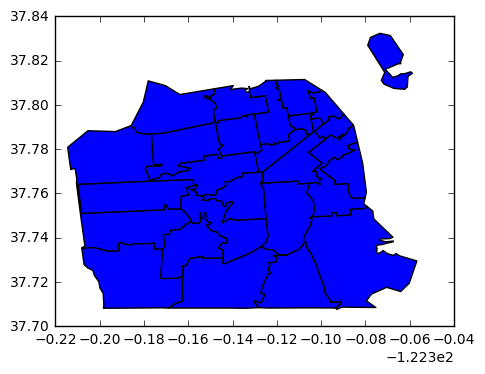

In [163]:
# A quick plot
# See here for cooler examples: https://gist.github.com/jorisvandenbossche/7b30ed43366a85af8626
gdf.plot()